In [16]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import pandas as pd
# Imports
import torch.nn as nn
# Import nn.functional
import torch.nn.functional as F
import matplotlib

In [12]:
file1 = open('data/market.txt', 'r') 
Lines = file1.readlines() 
  
count = 0
# Strips the newline character 
acc_list = []
for line in Lines: 
    if 'N' not in line:
      #print(line)
      try:
        acc_list.append(float(line))
      except:
        count +=1
    else:
      count +=1
print(count)

243


In [13]:
acc_list = np.array(acc_list)
print(acc_list)

[ 4529.05  4540.33  4540.65 ... 30887.28 30764.05 30927.15]


Text(0, 0.5, 'market capitalization')

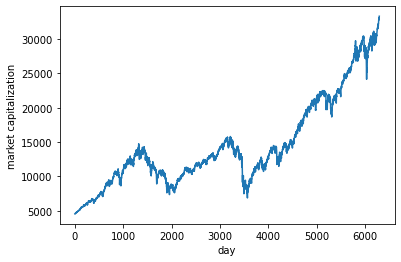

In [14]:
plt.plot(acc_list[:6300])
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('day')
plt.ylabel('market capitalization')

In [17]:
def xSin(x):
  a=30
  return x + torch.sin(a*x)*torch.sin(a*x)/a

class Net(nn.Module):
    # Initialize the layers
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1, 64)
        
        #self.linear1.weight = nn.Parameter(torch.zeros_like(self.linear1.weight).uniform_(-1, 1))
#        self.act1 = nn.Tanh() # Activation function
        #self.act1 = torch.sin # Activation function
        self.act1 = xSin # Activation function
        self.linear2 = nn.Linear(64, 64)
        self.linear2b = nn.Linear(64, 64)
        self.linear3 = nn.Linear(64, 1, bias=True)

    # Perform the computation
    def forward(self, x):
        x = self.linear1(x)
        x = self.act1(x) 
        x = self.linear2(x)
        x = self.act1(x) 
        x = self.linear2b(x)
        x = self.act1(x) 

        x = self.linear3(x)
        return x

tensor(0.3418, grad_fn=<MseLossBackward>)


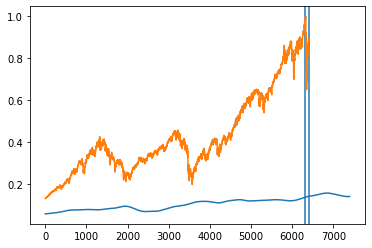

tensor(0.0050, grad_fn=<MseLossBackward>)


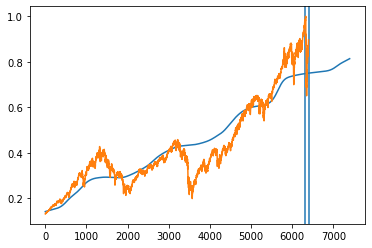

tensor(0.0033, grad_fn=<MseLossBackward>)


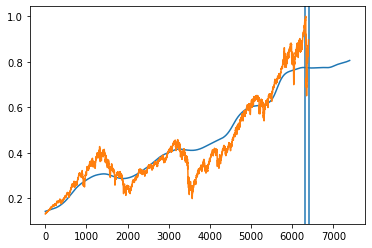

tensor(0.0021, grad_fn=<MseLossBackward>)


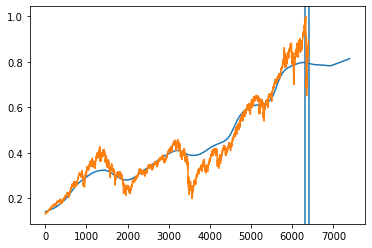

tensor(0.0014, grad_fn=<MseLossBackward>)


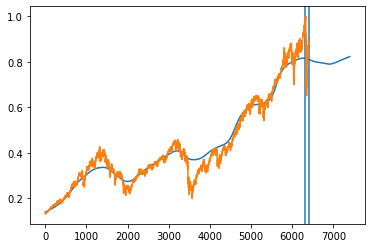

tensor(0.0010, grad_fn=<MseLossBackward>)


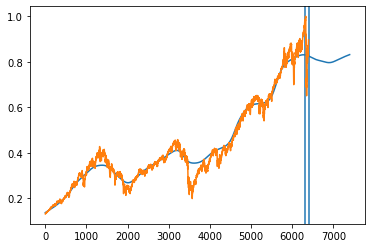

In [20]:
y_full = []
for i in range(0,1):
  ## running for multiple times
  model = Net()


  X = torch.Tensor(range(1, len(acc_list)+1)).float().unsqueeze(1) #[:6300]
  C = torch.max(X)
  X = X / torch.max(X)

  Y = torch.Tensor(acc_list).unsqueeze(1)# [:6300]

  Y = Y / torch.max(Y)

  opt = torch.optim.SGD(model.parameters(), 2e-2, momentum=0.9)
  loss_fn = F.mse_loss
  Epoch = 600
  losses = []
  test_losses = []

  for i in range(Epoch):
    model.train()
    opt.zero_grad()
    y = model(X[:6300])

    loss = loss_fn(y, Y[:6300])
    (loss).backward()
    opt.step()
    losses.append(loss)
    

    if i % 100 == 0:
      print(loss)
      x_test = torch.Tensor(range(1, len(acc_list)+1000) ).float().unsqueeze(1) / C

      plt.axvline(x=6300)
      plt.axvline(x=len(acc_list))


      y_test = model(x_test)
      #_full.append(y_test)
      plt.plot(y_test.detach().numpy())
      plt.plot(Y.detach().numpy())

      plt.show()
      plt.close()

  y_full.append(y_test.detach())

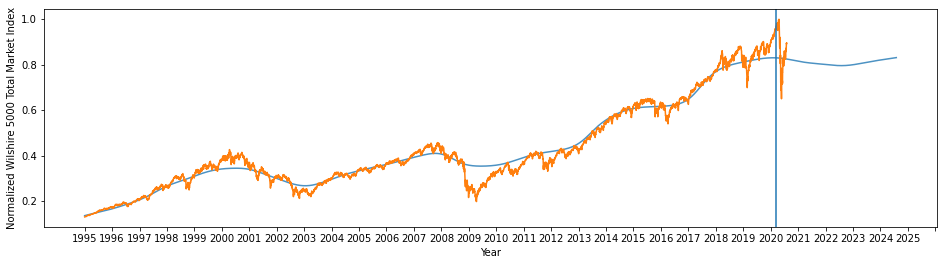

In [22]:
plt.figure(figsize=(16,4))
plt.plot(y_full[0].detach(), alpha=0.8)
#plt.plot(y_full[1].detach(), alpha=0.5)
#plt.plot(y_full[2].detach(), alpha=0.5)
#plt.plot(y_full[3].detach(), alpha=0.5)
plt.plot(Y)

plt.axvline(x=6300)

plt.xticks(range(0, 8000, 250), range(1995, 2026, 1))
plt.ylabel('Normalized Wilshire 5000 Total Market Index')
plt.xlabel('Year')

#plt.plot(y_full[4].detach())]
plt.savefig('stock.png', dpi=150, bbox_inches='tight')